In [1]:
# Import standard libraries
import json
import re
from collections import Counter

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import folium
from folium.plugins import (
    FastMarkerCluster,
    Fullscreen,
    MiniMap,
    HeatMap,
    HeatMapWithTime,
    LocateControl,
)
from wordcloud import WordCloud
from PIL import Image

# Data preparation
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import joblib

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

# Display settings
pd.set_option("display.max_columns", 100)

# Ensure inline plotting in Jupyter notebooks
%matplotlib inline

In [2]:
# Reading all the files
raw_path = '../data/'
customer_data = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
geolocation_data = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
order_data = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
order_items_data = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
order_payments_data = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
order_reviews_data = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
products_data = pd.read_csv(raw_path + 'olist_products_dataset.csv')
sellers_data = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')

In [15]:
# Display basic info
datasets = {
    'Customers': customer_data,
    'Geolocation': geolocation_data,
    'Orders': order_data,
    'Order Items': order_items_data,
    'Order Payments': order_payments_data,
    'Order Reviews': order_reviews_data,
    'Products': products_data,
    'Sellers': sellers_data
}

for name, df in datasets.items():
    print(f"--- {name} Dataset ---")
    print(df.info())
    print(df.head(), "\n")

--- Customers Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d06

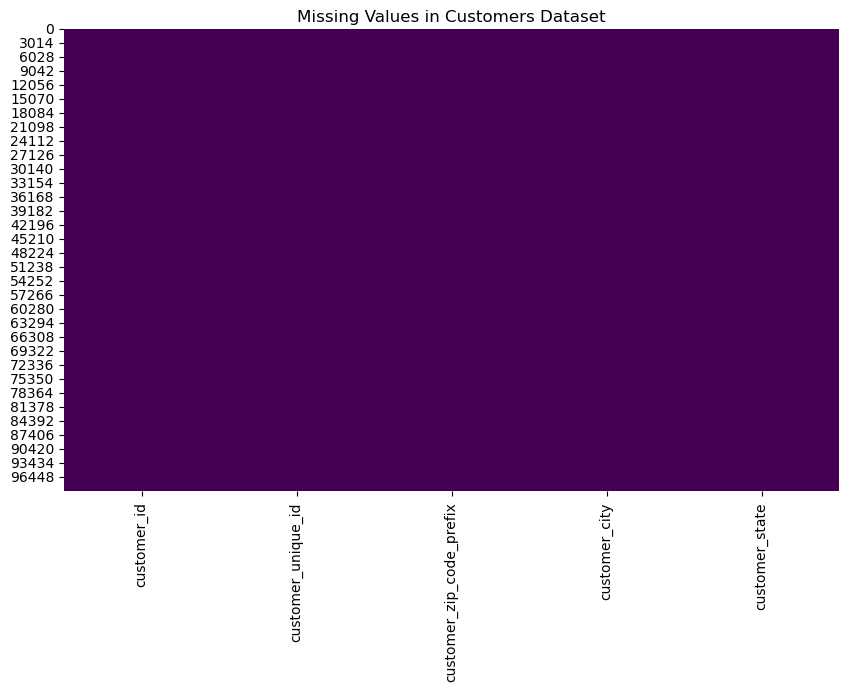

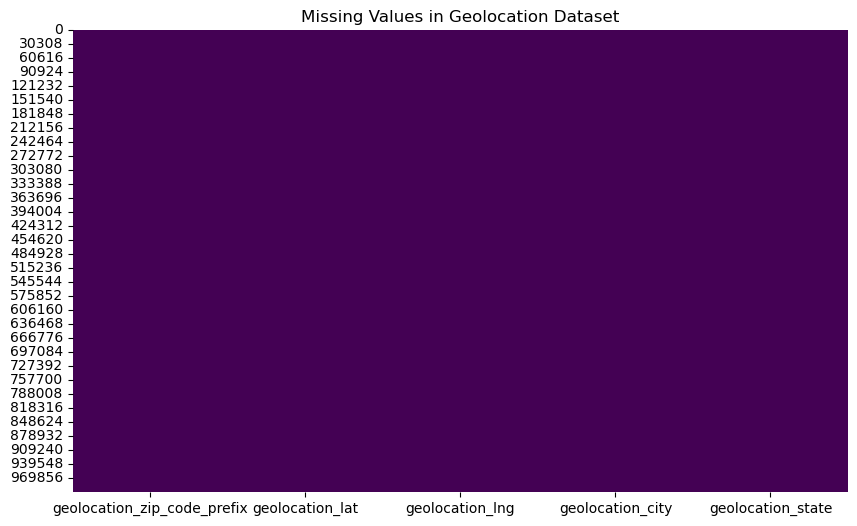

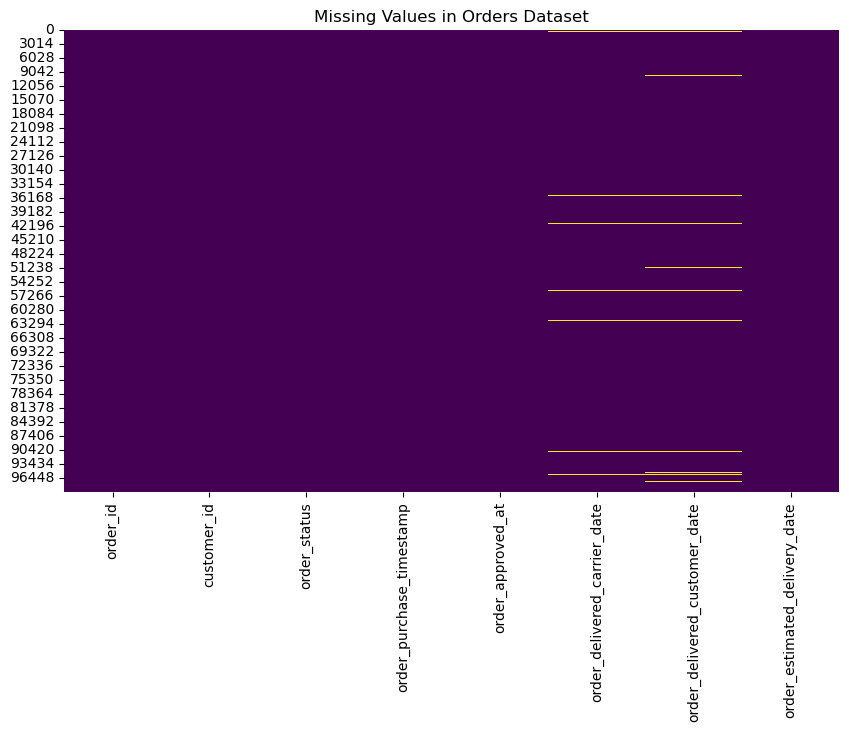

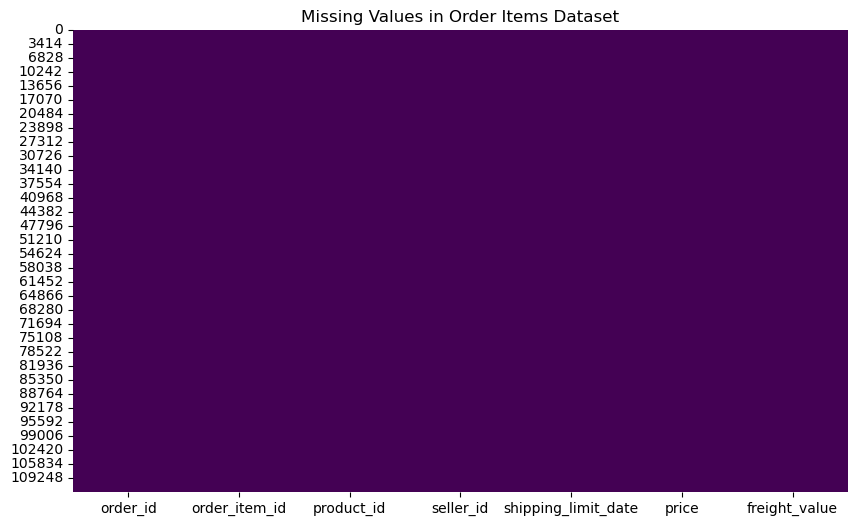

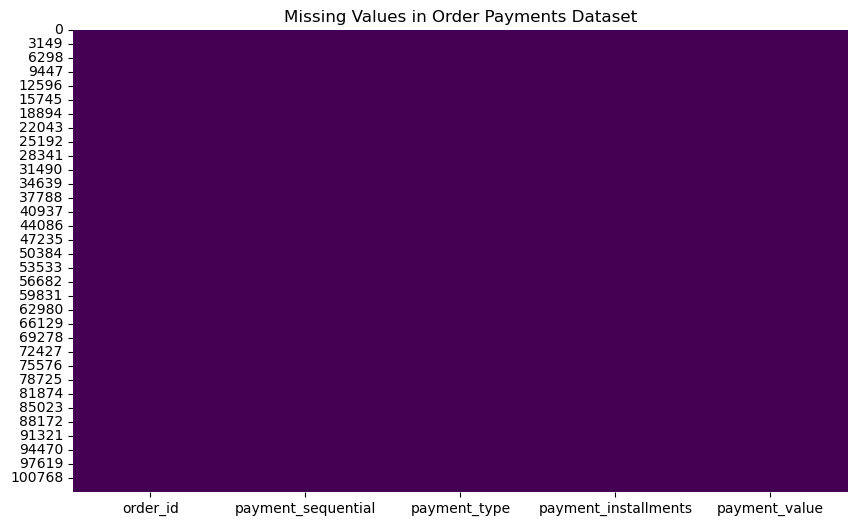

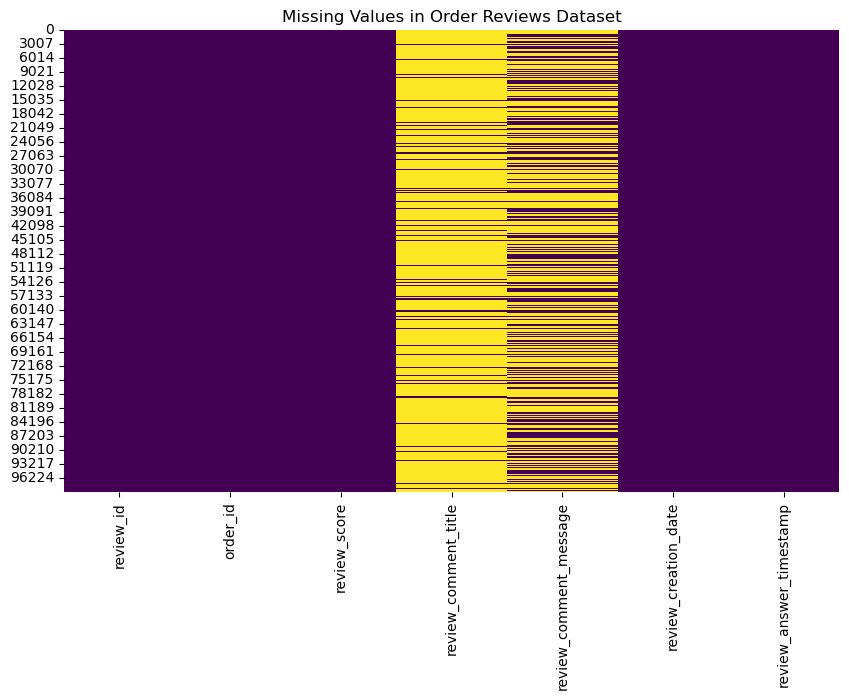

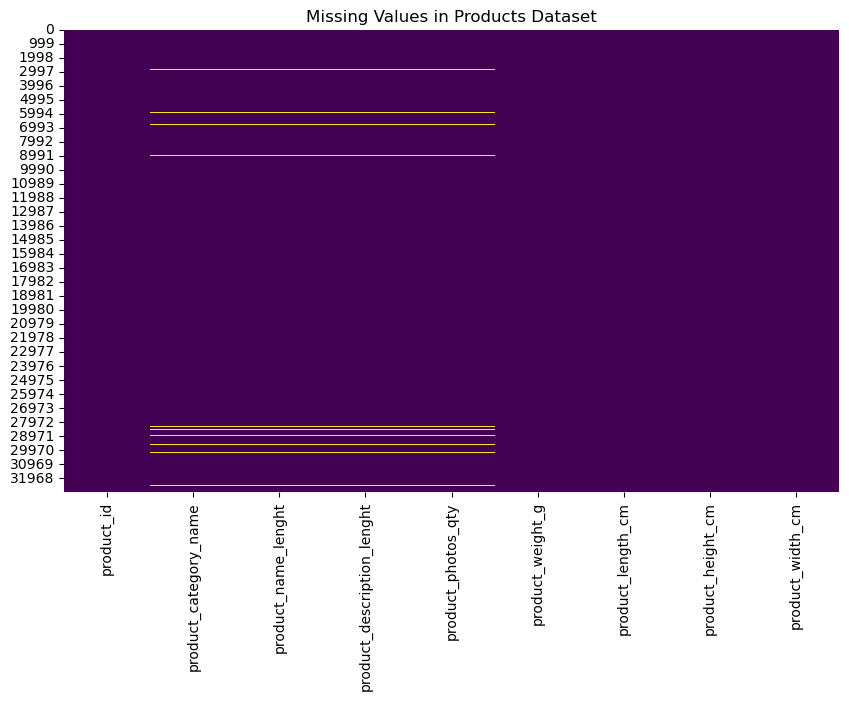

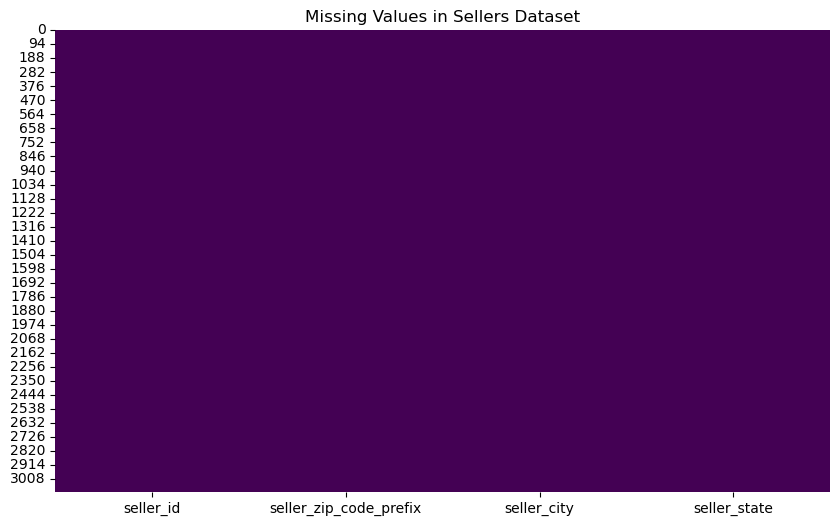

In [16]:
# Plot missing values heatmap for each dataset
def plot_missing_values(df, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.show()

for name, df in {
    'Customers': customer_data,
    'Geolocation': geolocation_data,
    'Orders': order_data,
    'Order Items': order_items_data,
    'Order Payments': order_payments_data,
    'Order Reviews': order_reviews_data,
    'Products': products_data,
    'Sellers': sellers_data
}.items():
    plot_missing_values(df, f"Missing Values in {name} Dataset")
